# **Exploratory Data Analysis of the Diamonds Dataset**

### ***Objectives:***
Before diving into building and training our neural network we will conduct **Exploratory Data Analysis (EDA)**. This notebook is aimed to:
1) Explore and understand the structure of the dataset
2) Identify key numerical and categorical features
3) Visualize data distributions and feature relationships to uncover insights

### ***Dataset:***
This project utilizes the **[Diamonds Dataset](https://www.kaggle.com/datasets/shivam2503/diamonds)** from Kaggle. The dataset contains information about diamond characteristics, such as carat weight, cut quality, color, clarity, and price. We will conduct EDA to identify which features it is better to use to train our Neural Network.

### ***Content of dataset***:
Features in **Diamonds Dataset** are as follows:

`price`: price in US dollars (\$326--\$18,823)

`carat`: weight of the diamond (0.2--5.01)

`cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color`: diamond colour, from J (worst) to D (best)

`clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x`: length in mm (0--10.74)

`y`: width in mm (0--58.9)

`z`: depth in mm (0--31.8)

`depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

`table`: width of top of diamond relative to widest point (43--95)

### ***1. Importing Libraries and Loading Data:***


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../data')

data = pd.read_csv('../data/raw/diamonds.csv')

### ***2. Data Overview:***

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


The dataset contains 53,940 rows and 10 columns with both **numerical** (`carat`, `depth`, `table`, `x`, `y`, `z`, `price`) and **categorical** (`cut`, `color`, `clarity`) features.

We can see that `price` has a high range, which indicate the further need for scaling or transformation. 

In the next sections we will take a look at features to decide which of them we could effectively use to train the neural network.

### ***3. Feature Identification:***

For now, let's separate the features into **numerical** and **categorical** groups:

In [7]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numerical colimns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

Numerical colimns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical columns: ['cut', 'color', 'clarity']


### ***4. Distribution of Numerical Features:***

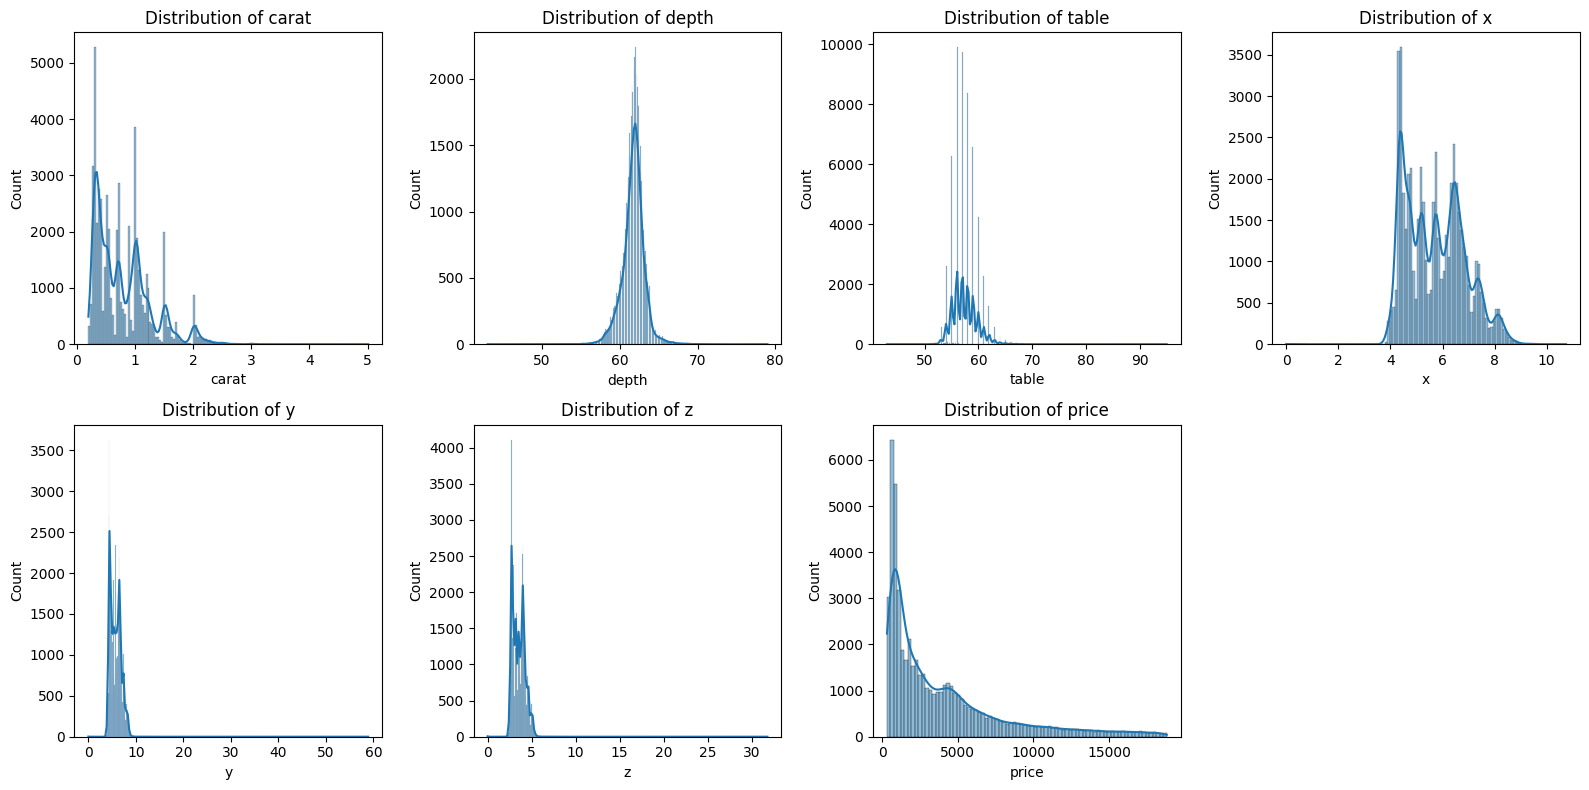

In [8]:
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We can identify positive skewness of particular features: `carat`, `x`, `y`, `z`, `price`.

### ***5. Distribution of Categorical Features:***

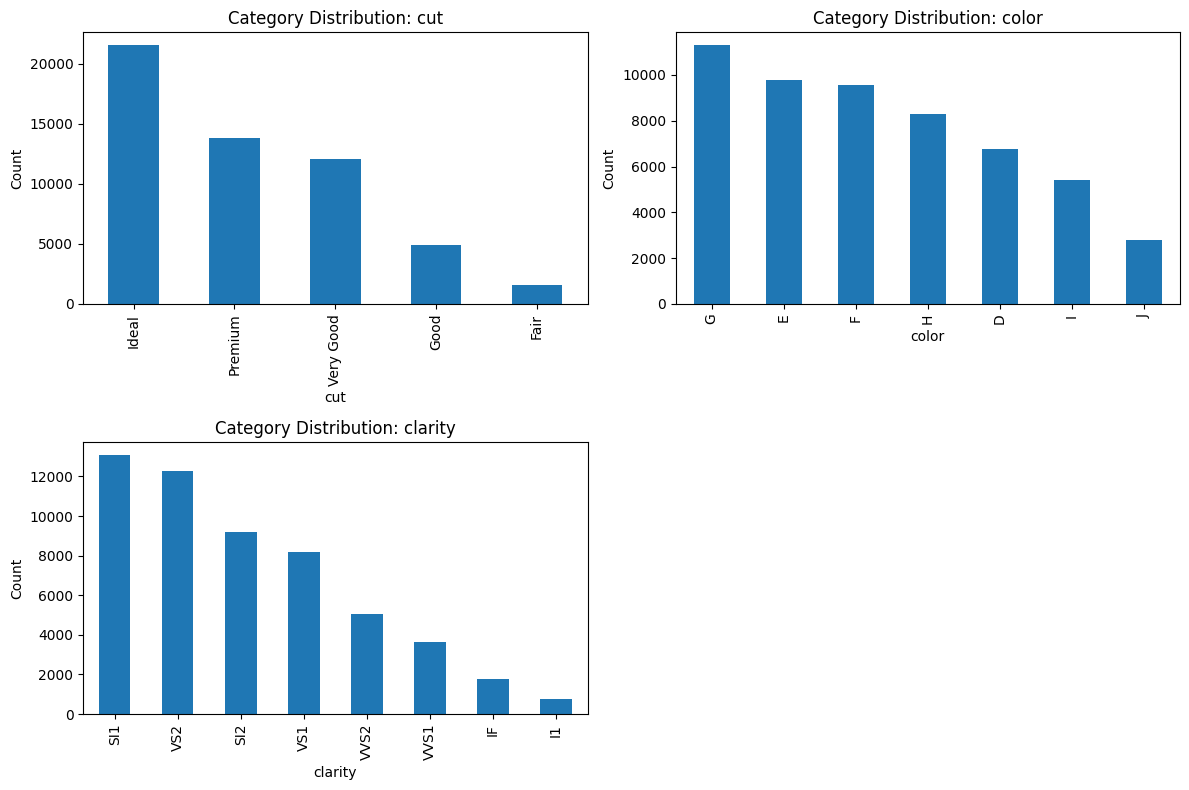

In [10]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten the axes for iteration

# Iterate through columns and create a plot for each
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Category Distribution: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove any extra subplots if there are fewer columns than grid slots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the bar plots we can make following conclusions about our categorical data:
- `Ideal` cut dominates, indicating high-quality diamonds.

- Grades `E` and `G` are most common (in terms of color).

- Categories of clarity `SI1` and `VS2` are the most prevalent.

### ***6. Class Distribution of Price:***

In [11]:
class_distribution = data['price'].value_counts(normalize=True) * 100
print(class_distribution)

price
605      0.244716
802      0.235447
625      0.233593
828      0.231739
776      0.229885
           ...   
13061    0.001854
13074    0.001854
13075    0.001854
13077    0.001854
13078    0.001854
Name: proportion, Length: 11602, dtype: float64


We can observe that the majority of the data is concentrated around a small subset of price values. Precisely, lower prices (`605`, `802`, `625`, etc.) have higher proportions (~23-24%). On the other hand,  there is long tail distribution of higher prices (e.g., higer prices have low proportions).

Once again, we could conclude that we must consider normalization of the `price` variable to pervent potential issues in model training.

### ***7. Correlation Analysis:***

To identify which features we should use to train the model, let's refer to Correlation Heatmap:

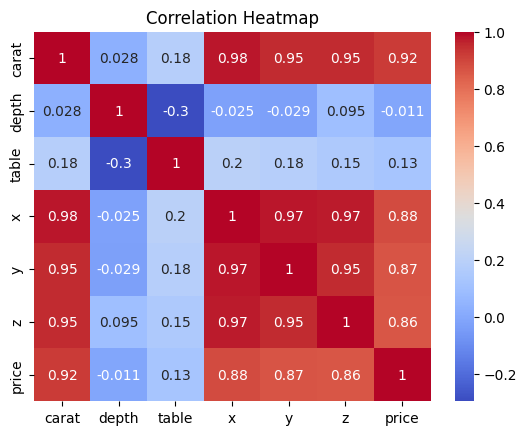

In [14]:
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


We can notice that there is strong positive correlation between `x`, `y`, `z`, `carat` features and `price` (our target variable).

Categorical features (`cut`, `color`, `clarity`), on the other hand, do not directly exhibit linear relationships with the `price`.  

### ***8. Pair Plot for Numerical Features:***

We can visualize bivariate relationships between numerical features by using pair plots as well:

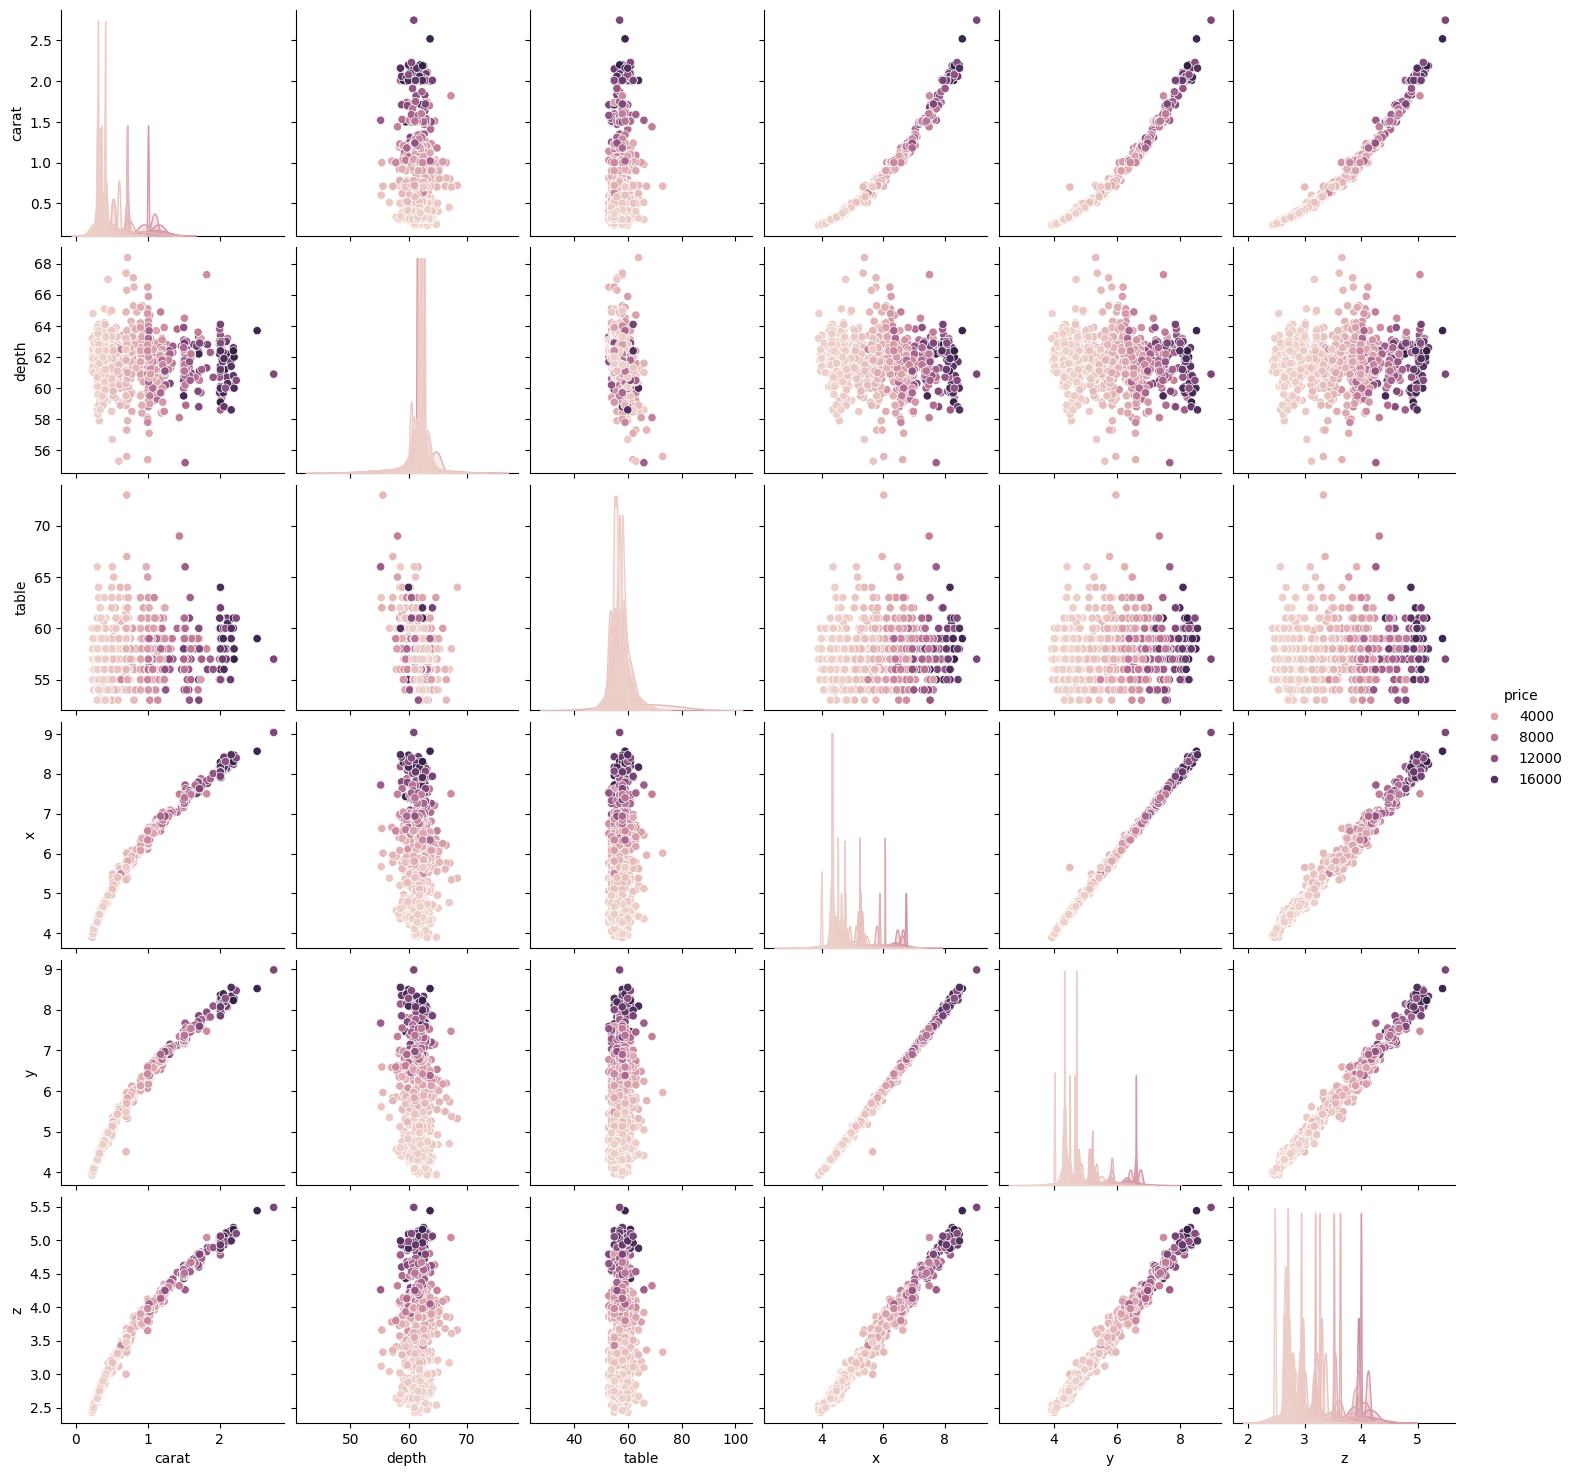

In [13]:
sampled_data = data.sample(n=1000, random_state=42) 
sns.pairplot(sampled_data, hue='price')
plt.show()

Again, it is clear that higher values of `carat`, `x`,`y`,`z` corresppond to higher `price`. That is why we select `carat`, `x`, `y`, and `z` as the primary features for our predictive model!

### ***9. Outlier Detection:***

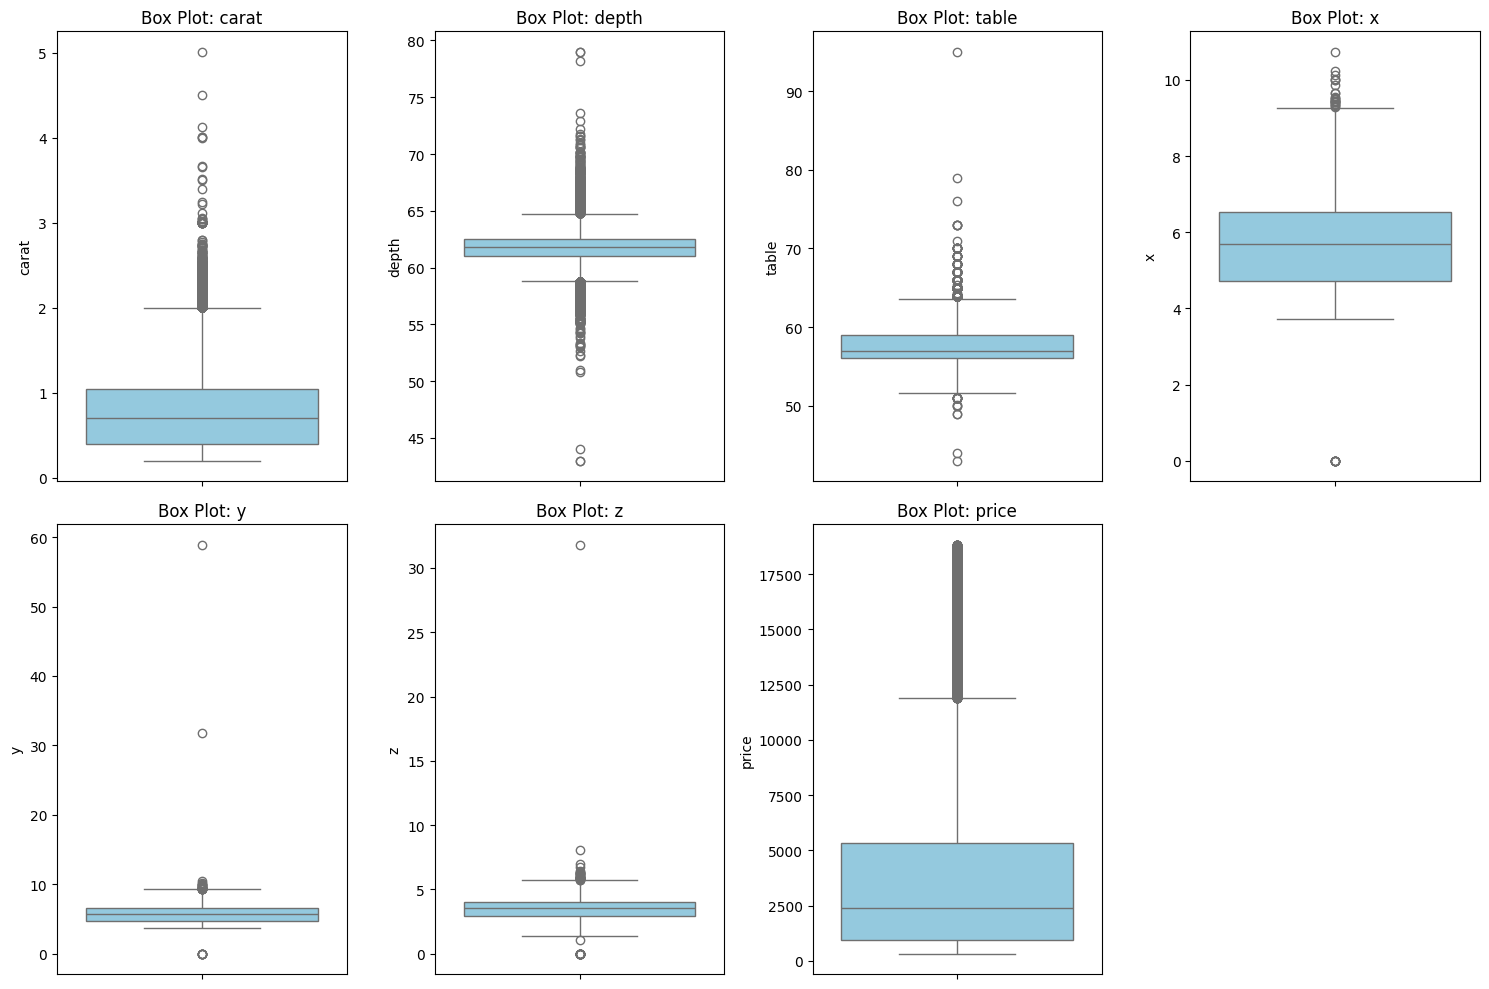

In [21]:
rows, cols = 2, 4  
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(col)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


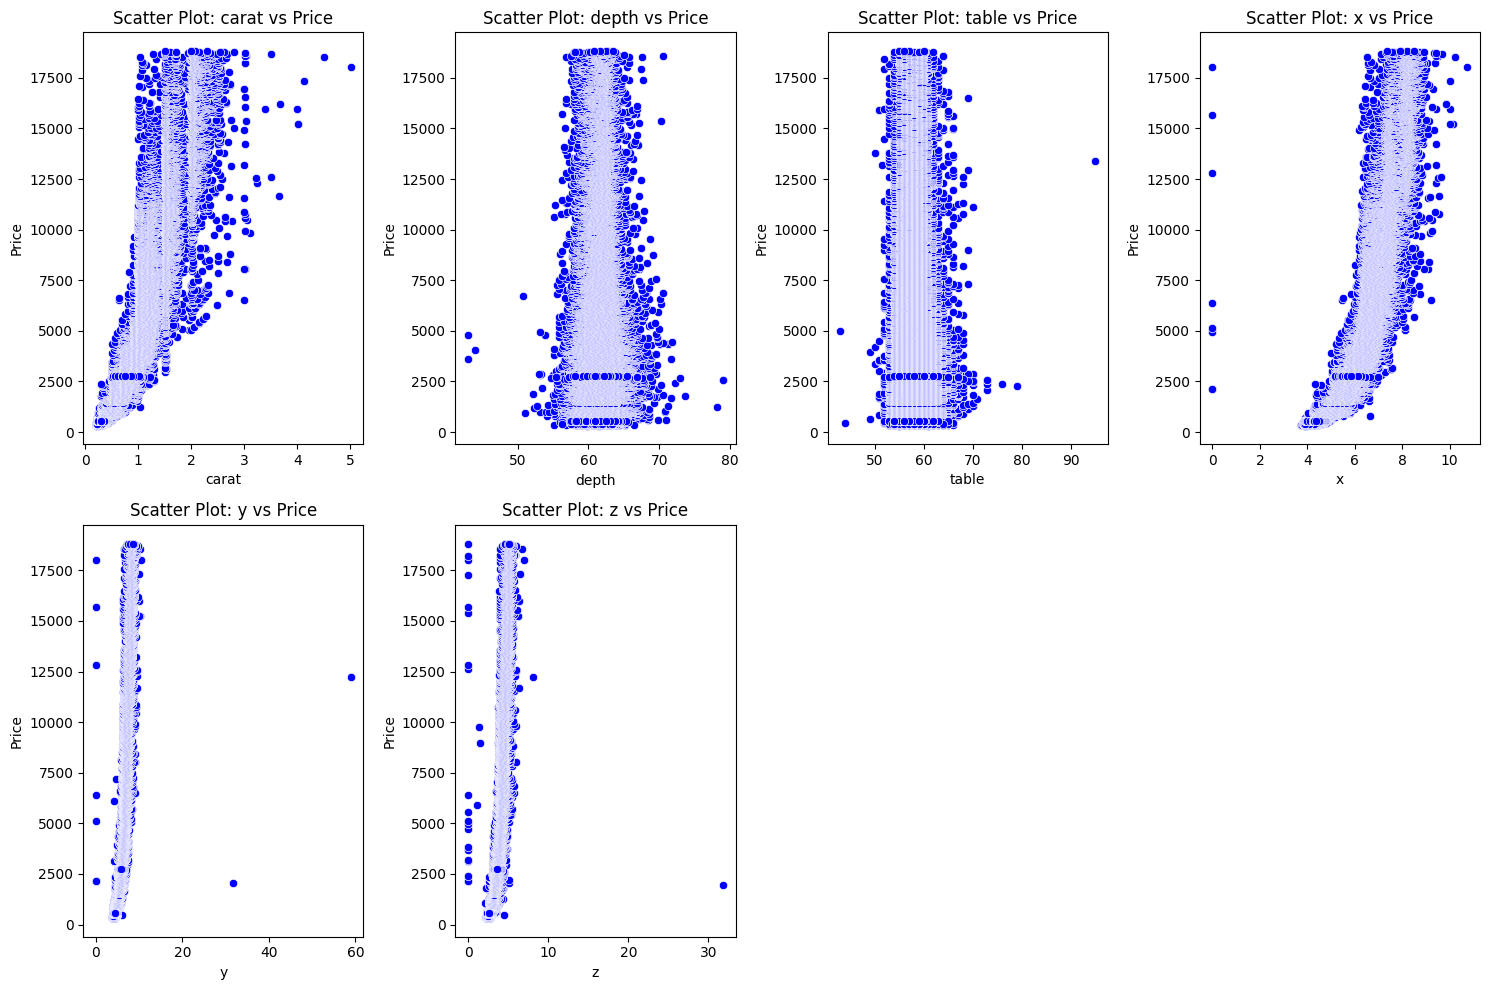

In [20]:
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    if col != 'price':
        sns.scatterplot(x=data[col], y=data['price'], ax=axes[i], color='blue')
        axes[i].set_title(f'Scatter Plot: {col} vs Price')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')

for j in range(len(numerical_columns) - 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We can observe outliers at higher ranges in `carat` and `price` distributions as well as some extreme values of `x`, `y`, `z`.
 

### ***Conclusion:***
- Since the is strong positive correlation between `carat`, `x`,`y`,`z` and `price`, for our model we select these variables as features.
- We have to adress `price`'s skewness.
- We are going to handle outliers to preven bias.

Now, we are ready to build and train Deep Neural Network model to predict diamonds prices!